- Accuracy:
- R2 score:
- F1 score: 用于测量不均衡数据的分数
- Error：
    - 过拟合   训练误差小于测试误差   L1/L2正则化 Dropout

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

In [3]:
iris = load_iris()
X = iris.data
y = iris.target

In [4]:
X_train,X_test, y_train, y_test = train_test_split(X,y, random_state=4)
knn = KNeighborsClassifier(n_neighbors=5) # 数据点附近的5个值平均一下作为y
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

print(knn.score(X_test,y_test))

0.9736842105263158


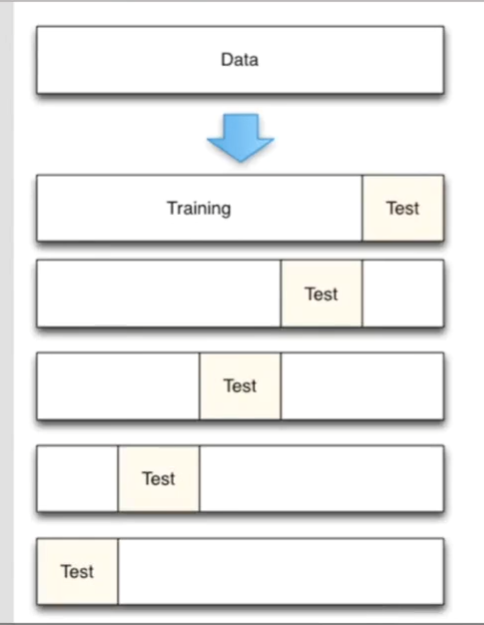

In [7]:
# 交叉验证
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier(n_neighbors=5) # 如何选择参数
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')  # 交叉验证，自动分为5组
print(scores)
print(scores.mean())  # 平均误差

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


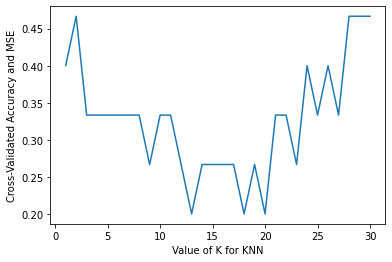

In [16]:
# 如何选择参数--调参
import matplotlib.pyplot as plt

k_range = range(1,31)
k_scores = []
k_loss = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)  # 找到好的参数
    scores= cross_val_score(knn, X, y, cv=10, scoring='accuracy')  # for classification
    loss = -cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error') # for regression
    k_scores.append(scores.mean())
    k_loss.append(loss.mean()*10)

# plt.plot(k_range, k_scores)
plt.plot(k_range, k_loss)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy and MSE')
plt.show() # 误差减小，说明模型变得复杂，更容易出现过拟合现象

In [12]:
import sklearn  # 模型评价中的参数列表
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_absolute_percentage_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'rand_score',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_we

## Overfitting

In [18]:
from sklearn.model_selection import learning_curve  # 可视化学习过程
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits=load_digits()
X = digits.data
y = digits.target

In [19]:
train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma=0.001),
    X,
    y,
    cv = 10, # 交叉验证
    scoring='neg_mean_squared_error',
    train_sizes=[0.1, 0.25, 0.5, 0.75,1])  # 记录点的% 

train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

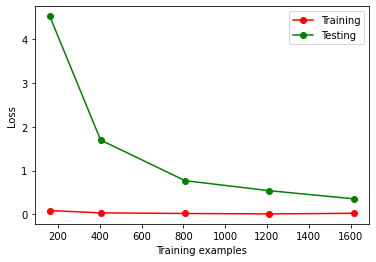

In [21]:
plt.plot(train_sizes, train_loss_mean, 'o-', color='r', label='Training')
plt.plot(train_sizes, test_loss_mean, 'o-', color='g', label='Testing')
plt.xlabel('Training examples')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

## 交叉验证3

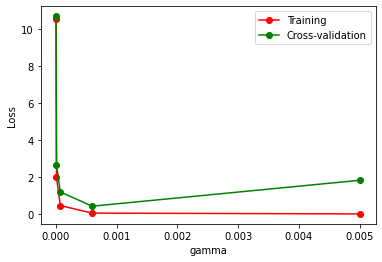

In [23]:
# 通过validation_curve选取模型中合适的参数，防止出现过拟合现象，
# 可以找到正好过拟合的参数值
from sklearn.model_selection import validation_curve  # 可视化学习过程
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

digits = load_digits()
X = digits.data
y = digits.target

# 参数拟合范围
param_range = np.logspace(-6, -2.3, 5) # 该范围中取5个点
train_loss, test_loss = validation_curve(
    SVC(),
    X,
    y,
    param_name='gamma', # 需要改变的参数值
    param_range=param_range,
    cv = 10, # 交叉验证
    scoring='neg_mean_squared_error')

train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

plt.plot(param_range, train_loss_mean, 'o-', color='r', label='Training')
plt.plot(param_range, test_loss_mean, 'o-', color='g', label='Cross-validation')
plt.xlabel('gamma')
plt.ylabel('Loss')
plt.legend(loc='best')
plt.show()

# gamma参数对loss的影响

这是一个过拟合的过程，训练集的误差小于测试集的误差